<!-- Chatgpt prompt: using public data sources and python with geopandas, write code to display a map from public sources showing the range of the blue spruce (Picea pungens) described as follows:
Blue spruce is primarily native to the central and southern Rocky Mountains of the western United States. Its range extends from latitude 33° 50' to 48° 54' N. and from longitude 104° 45' to 114° 00' W.; the Rocky Mountain region in high mountains from southern and western Wyoming, eastern Idaho, south to Utah, northern and eastern Arizona, southern New Mexico, to central Colorado. It has been reported in isolated locations in north-central Montana. -->

In [6]:
%store

Stored variables and their in-db values:
band_dict                                   -> {'aerosol': <xarray.DataArray (y: 447, x: 504)> Si
boulder_areawater_gdf                       ->      ANSICODE       HYDROID          FULLNAME  MTF
boulder_gdf                                 ->     STATEFP COUNTYFP  COUNTYNS  GEOID         GEOI
boulder_linearwater_gdf                     ->      ANSICODE      LINEARID            FULLNAME AR
data_dir                                    -> 'C:\\Users\\gpaul\\earth-analytics\\data\\redlinin
denver_aoi_gdf                              ->       area_id    city state  city_surve           
denver_merged_das                           -> {'red': <xarray.DataArray (y: 599, x: 533)> Size: 
denver_ndmi_da                              -> <xarray.DataArray (y: 447, x: 504)> Size: 901kB
ar
denver_ndvi_da                              -> <xarray.DataArray (y: 447, x: 504)> Size: 901kB
ar
denver_proj_aoi_gdf                         ->       area_id    city state  c

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import contextily as ctx

# Define the bounding coordinates of the blue spruce's range
# Coordinates are in latitude and longitude (WGS 84)
range_coordinates = [
    (-104.75, 33.83),  # Southernmost point (New Mexico)
    (-104.75, 48.9),   # Northernmost point (Montana)
    (-114.0, 48.9),    # Westernmost point (Idaho/Wyoming border)
    (-114.0, 33.83),   # Southwesternmost point (Arizona)
    (-104.75, 33.83)   # Close the polygon
]

# Create a Polygon geometry for the range
range_polygon = Polygon(range_coordinates)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'range': ['Blue Spruce']}, geometry=[range_polygon], crs="EPSG:4326")

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, edgecolor='blue', linewidth=2, label="Blue Spruce Range")
gdf.plot(ax=ax, alpha=0.3, color='lightblue')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.Terrain)

# Add labels and title
ax.set_title("Range of Blue Spruce (Picea pungens)", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.show()


NameError: name 'boulder_gdf' is not defined

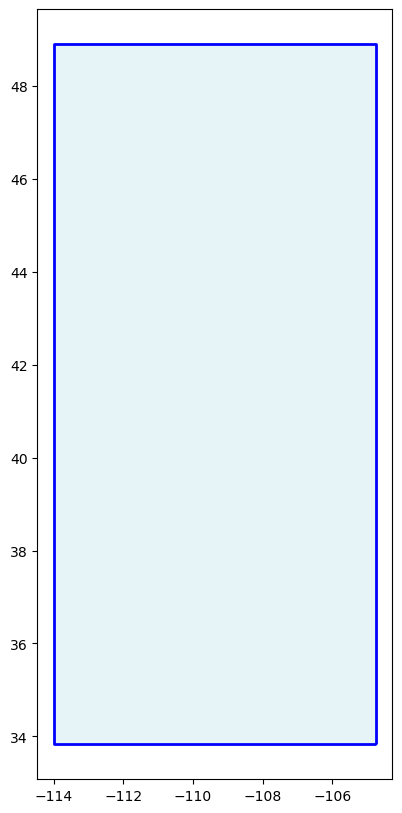

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import contextily as ctx

# Define the bounding coordinates of the blue spruce's range
range_coordinates = [
    (-104.75, 33.83),  # Southernmost point (New Mexico)
    (-104.75, 48.9),   # Northernmost point (Montana)
    (-114.0, 48.9),    # Westernmost point (Idaho/Wyoming border)
    (-114.0, 33.83),   # Southwesternmost point (Arizona)
    (-104.75, 33.83)   # Close the polygon
]

# Create a Polygon geometry for the range
range_polygon = Polygon(range_coordinates)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'range': ['Blue Spruce']}, geometry=[range_polygon], crs="EPSG:4326")

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, edgecolor='blue', linewidth=2, label="Blue Spruce Range")
gdf.plot(ax=ax, alpha=0.3, color='lightblue')


# Add basemap using OpenStreetMap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels and title
ax.set_title("Range of Blue Spruce (Picea pungens)", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.show()


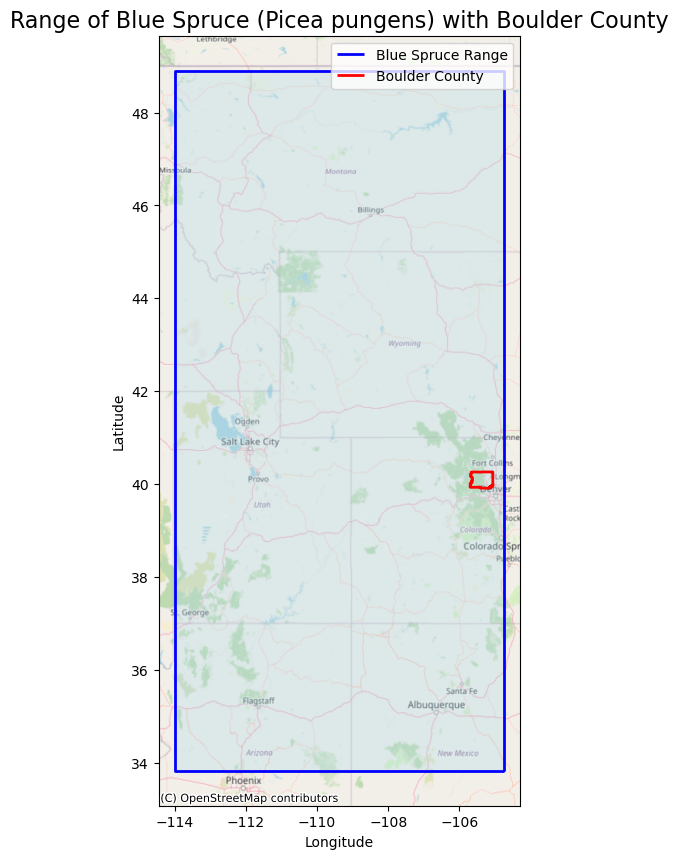

In [11]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import contextily as ctx

# Define the bounding coordinates of the blue spruce's range
range_coordinates = [
    (-104.75, 33.83),  # Southernmost point (New Mexico)
    (-104.75, 48.9),   # Northernmost point (Montana)
    (-114.0, 48.9),    # Westernmost point (Idaho/Wyoming border)
    (-114.0, 33.83),   # Southwesternmost point (Arizona)
    (-104.75, 33.83)   # Close the polygon
]

# Create a Polygon geometry for the range
range_polygon = Polygon(range_coordinates)

# Create a GeoDataFrame for the Blue Spruce range
gdf = gpd.GeoDataFrame({'range': ['Blue Spruce']}, geometry=[range_polygon], crs="EPSG:4326")

# Example: Boulder County GeoDataFrame
# Replace this with your actual `boulder_gdf` containing Boulder County's boundary
# boulder_geometry = [Polygon([
#     (-105.5, 39.8), (-105.5, 40.3), (-105.0, 40.3), (-105.0, 39.8), (-105.5, 39.8)
# ])]
# boulder_gdf = gpd.GeoDataFrame({'county': ['Boulder County']}, geometry=boulder_geometry, crs="EPSG:4326")
# Read the Boulder County shapefile
shapefile_path = 'boulder_county.shp'
boulder_county_gdf = gpd.read_file(shapefile_path)



# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Blue Spruce range
gdf.boundary.plot(ax=ax, edgecolor='blue', linewidth=2, label="Blue Spruce Range")
gdf.plot(ax=ax, alpha=0.3, color='lightblue')

# Plot Boulder County outline
boulder_county_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label="Boulder County")

# Add basemap using OpenStreetMap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels and title
ax.set_title("Range of Blue Spruce (Picea pungens) with Boulder County", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.show()


C:\Users\gpaul\AppData\Local\Temp\ipykernel_8936\2857616859.py:45: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax1.legend()
C:\Users\gpaul\AppData\Local\Temp\ipykernel_8936\2857616859.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


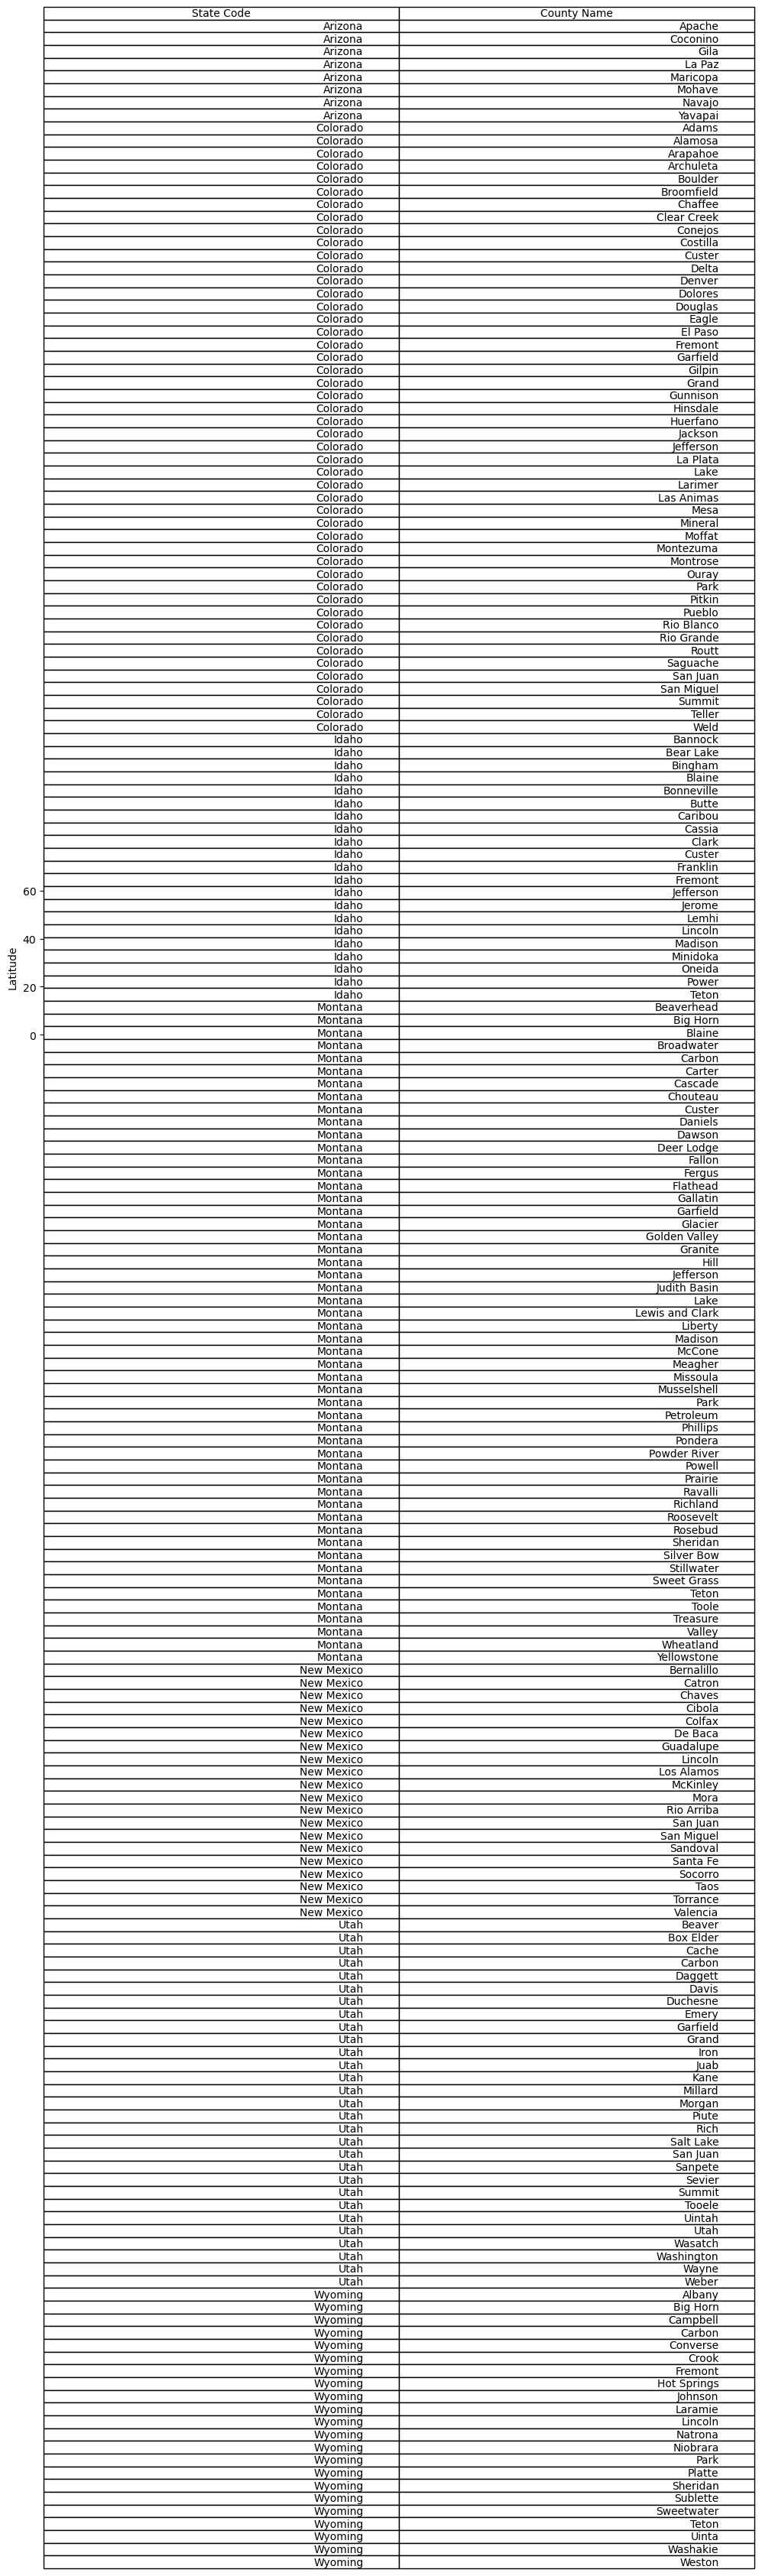

In [13]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Define the bounding coordinates of the blue spruce's range
range_coordinates = [
    (-104.75, 33.83),  # Southernmost point (New Mexico)
    (-104.75, 48.9),   # Northernmost point (Montana)
    (-114.0, 48.9),    # Westernmost point (Idaho/Wyoming border)
    (-114.0, 33.83),   # Southwesternmost point (Arizona)
    (-104.75, 33.83)   # Close the polygon
]

# Create a Polygon geometry for the range
range_polygon = Polygon(range_coordinates)

# Create a GeoDataFrame for the Blue Spruce range
range_gdf = gpd.GeoDataFrame({'range': ['Blue Spruce']}, geometry=[range_polygon], crs="EPSG:4326")

# Load U.S. counties shapefile
# Replace this with the path to a shapefile or dataset containing all U.S. counties
counties_gdf = gpd.read_file("../UScounties/tl_2024_us_county.shp")

# Ensure the counties GeoDataFrame and range GeoDataFrame have the same CRS
counties_gdf = counties_gdf.to_crs(range_gdf.crs)

# Find counties intersecting the blue spruce range
intersecting_counties = gpd.overlay(counties_gdf, range_gdf, how='intersection')

# Sort counties by state and county name
intersecting_counties = intersecting_counties.sort_values(['STATEFP', 'NAME'])

# Create a figure with two subplots: one for the map and one for the table
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 1, height_ratios=[2, 1])

# Plot the map with counties and the blue spruce range
ax1 = fig.add_subplot(gs[0])
range_gdf.plot(ax=ax1, alpha=0.3, color='lightblue', label="Blue Spruce Range")
counties_gdf.boundary.plot(ax=ax1, linewidth=0.5, color='gray', alpha=0.5)
intersecting_counties.boundary.plot(ax=ax1, edgecolor='red', linewidth=1, label="Intersecting Counties")

ax1.set_title("Blue Spruce Range and Intersecting U.S. Counties", fontsize=16)
ax1.legend()
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

# Prepare the table data
table_data = intersecting_counties[['STATEFP', 'NAME']].rename(columns={'STATEFP': 'State Code', 'NAME': 'County Name'})
table_data['State Code'] = table_data['State Code'].map({
    '08': 'Colorado', '49': 'Utah', '16': 'Idaho', '35': 'New Mexico', '56': 'Wyoming', '30': 'Montana', '04': 'Arizona'
})

# Plot the table
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')  # Turn off axis
ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


<!-- To identify the county outside Colorado that is most similar to Boulder County in terms of suitability for blue spruce (Picea pungens), we can consider the specific habitat characteristics detailed in forest studies. Blue spruce thrives in moist, well-drained soils, often near streams or in regions with sufficient annual precipitation. It is commonly found in mountainous regions at elevations ranging from 6,000 to 10,000 feet, though lower limits may vary depending on local conditions.

Boulder County's climate and forest composition feature high-altitude conditions with abundant subalpine forest species like Engelmann spruce, Douglas-fir, and lodgepole pine. These characteristics closely resemble many counties in Utah, northern New Mexico, and southern Wyoming, particularly those with montane and subalpine habitats.

A potential match outside Colorado could be Albany County, Wyoming, which includes the Medicine Bow National Forest. This region supports similar high-altitude ecosystems, hosts blue spruce, and shares many climatic and soil conditions with Boulder County. Another candidate could be Taos County, New Mexico, where elevations and precipitation levels also align with the needs of blue spruce, albeit in a slightly warmer context.

For further details on the blue spruce's habitat requirements and its associated forest types, you can refer to resources like the USDA Forest Service's Silvics Manual, which provides in-depth ecological information about species and their growing conditions【19】【20】. -->

<!-- To identify the county outside Colorado that is most similar to Boulder County in terms of suitability for blue spruce (Picea pungens), we can consider the specific habitat characteristics detailed in forest studies. Blue spruce thrives in moist, well-drained soils, often near streams or in regions with sufficient annual precipitation. It is commonly found in mountainous regions at elevations ranging from 6,000 to 10,000 feet, though lower limits may vary depending on local conditions.

Boulder County's climate and forest composition feature high-altitude conditions with abundant subalpine forest species like Engelmann spruce, Douglas-fir, and lodgepole pine. These characteristics closely resemble many counties in Utah, northern New Mexico, and southern Wyoming, particularly those with montane and subalpine habitats.

A potential match outside Colorado could be Albany County, Wyoming, which includes the Medicine Bow National Forest. This region supports similar high-altitude ecosystems, hosts blue spruce, and shares many climatic and soil conditions with Boulder County. Another candidate could be Taos County, New Mexico, where elevations and precipitation levels also align with the needs of blue spruce, albeit in a slightly warmer context.

For further details on the blue spruce's habitat requirements and its associated forest types, you can refer to resources like the USDA Forest Service's Silvics Manual, which provides in-depth ecological information about species and their growing conditions【19】【20】. -->